In [53]:
import pandas as pd
import matplotlib.pyplot as plt

lm_path = f"./language_modeling.csv"
mcp_path = f"./multiple_choice_prompt.csv"
poe_path = f"./process_of_elimination.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
poe_df = pd.read_csv(poe_path)


In [54]:
def process(df):
    # get rid of identical rows 
    df = df.drop_duplicates()
    # select rows where checkpoint starts with "google/flan-t5"
    df = df[df["checkpoint"].str.startswith("google/flan-t5")]
    # remove the seed column and batch_size column
    df = df.drop(columns=["model_family", "seed", "batch_size"])
    return df
    

In [55]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
poe_df = process(poe_df)
# concatenate the three dataframes
df = pd.concat([lm_df, mcp_df])
df

,checkpoint,dataset,method,accuracy
0,google/flan-t5-small,cqa,language_modeling,0.2916
1,google/flan-t5-small,cqa,average_language_modeling,0.3145
2,google/flan-t5-small,copa,language_modeling,0.5960
3,google/flan-t5-small,copa,average_language_modeling,0.6100
4,google/flan-t5-small,obqa,language_modeling,0.1420
5,google/flan-t5-small,obqa,average_language_modeling,0.2140
6,google/flan-t5-small,piqa,language_modeling,0.6240
7,google/flan-t5-small,piqa,average_language_modeling,0.6099
8,google/flan-t5-small,siqa,language_modeling,0.4186
9,google/flan-t5-small,siqa,average_language_modeling,0.4371


<AxesSubplot:xlabel='dataset'>

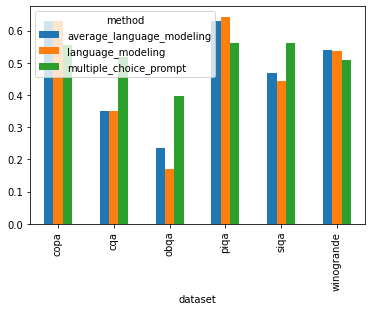

In [75]:
# grouped = df.groupby(['checkpoint', 'dataset', 'method'])['accuracy'].mean()
grouped = df.groupby(['dataset', 'method'])['accuracy'].mean()
# grouped.plot(kind="bar")
grouped.unstack().plot(kind="bar")
